# M4.1 - Classification Concepts

In [10]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

## M2.1.1 - IRIS
### M2.1.1.1 - Data Processing

In [11]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

print(f'Type of the dataset object: {type(iris_dataset)}')
print()
print("Keys of iris_dataset:\n", iris_dataset.keys())

Type of the dataset object: <class 'sklearn.utils.Bunch'>

Keys of iris_dataset:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [12]:
print(iris_dataset['DESCR'][:211] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes
...


In [13]:
print(f'Data datatype: {type(iris_dataset.data)}, Shape: {iris_dataset.data.shape}')
print(f'Target datatype: {type(iris_dataset.target)}, Shape: {iris_dataset.target.shape}')

Data datatype: <class 'numpy.ndarray'>, Shape: (150, 4)
Target datatype: <class 'numpy.ndarray'>, Shape: (150,)


In [14]:
print("Feature names:\n", iris_dataset['feature_names'])
print("Target names:", iris_dataset['target_names'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [15]:
print("First five rows of data:\n", iris_dataset['data'][:5])

First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [16]:
iris_df = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
iris_df['target'] = iris_dataset.target

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### M2.1.1.2 - EDA

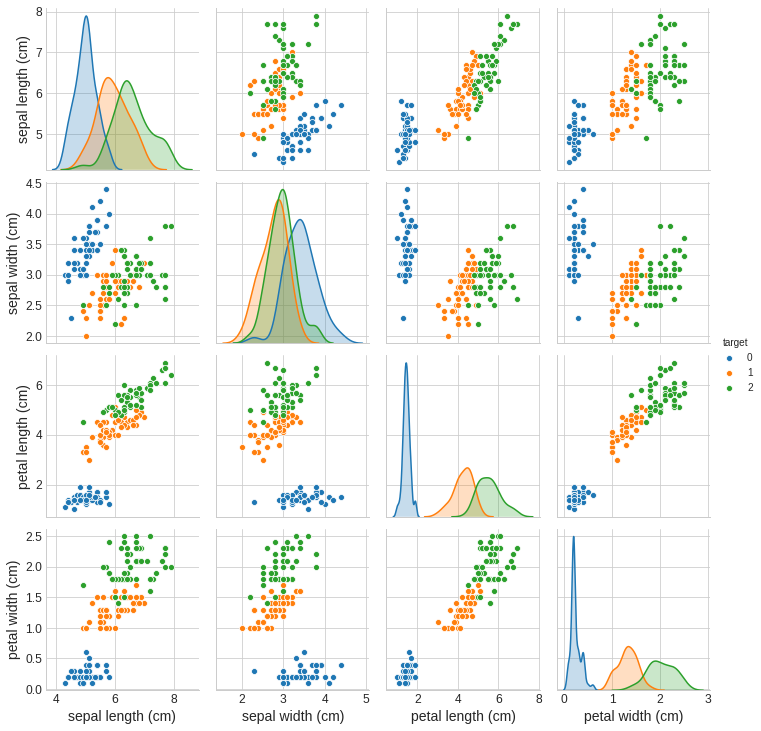

In [21]:
from IPython.display import Image
iris_df['target'] = iris_df['target'].astype('category')
sns_plot = sns.pairplot(iris_df, vars = iris_dataset['feature_names'], hue='target')

In [20]:
# Image(filename='img/iris_pairplot.png')

FileNotFoundError: ignored

In [22]:
X = iris_dataset.data
y = iris_dataset.target
print(X.shape, y.shape)

(150, 4) (150,)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify = y)

unique, counts = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

array([[ 0, 40],
       [ 1, 40],
       [ 2, 40]])

In [24]:
from sklearn.decomposition import PCA

pca = PCA()

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)
print(X_train_pca.shape, X_test_pca.shape)

(120, 4) (30, 4)


### M2.1.1.3 kNN Classification

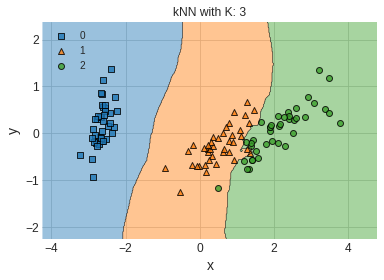

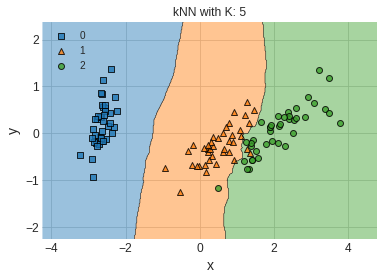

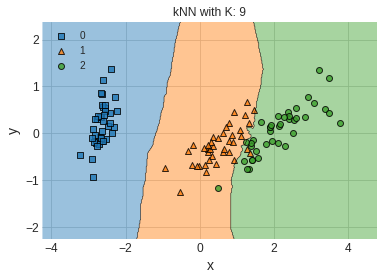

In [25]:
from sklearn import neighbors
from mlxtend.plotting import plot_decision_regions

def knn_comparison(X, y, k):
    x = X
    y = y
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(x, y)
    
    # Plotting decision region
    plot_decision_regions(x, y, clf=clf, legend=2)
    
    # Adding axes annotations
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'kNN with K: {k}')
    plt.show()
    
for i in [3, 5, 9]:
    knn_comparison(X_train_pca[:, :2], y_train, i)

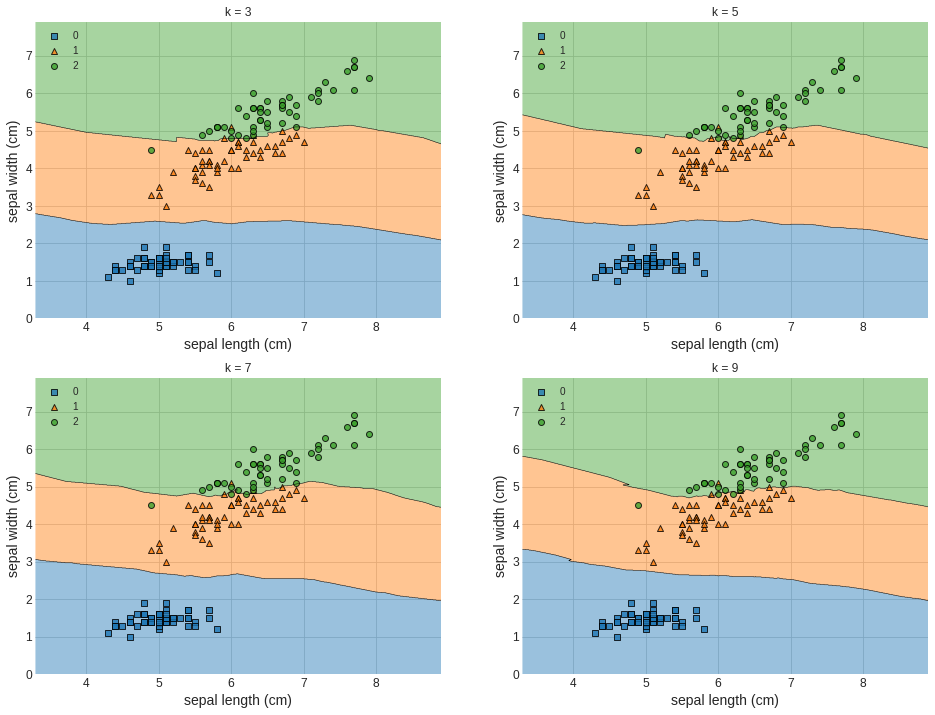

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 2)


clf1 = KNeighborsClassifier(n_neighbors= 3)
clf2 = KNeighborsClassifier(n_neighbors= 5)
clf3 = KNeighborsClassifier(n_neighbors= 9)
clf4 = KNeighborsClassifier(n_neighbors= 15)

X = iris_dataset.data[:, [0,2]]
y = iris_dataset.target

fig = plt.figure(figsize=(16,12))

labels = ['k = 3', 'k = 5', 'k = 7', 'k = 9']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')

# plt.savefig('knn.png')
# plt.clf()

In [ ]:
# Image(filename='img/knn.png')

### kNN Evaluation

In [27]:
from sklearn import metrics

# default n_neighbors = 5
knn   = neighbors.KNeighborsClassifier(n_neighbors=5)
fit   = knn.fit(X_train, y_train)
Y_test_pred = fit.predict(X_test)

# evaluate our predictions against the held-back testing targets
print("5NN accuracy:", 
      metrics.accuracy_score(y_test, Y_test_pred))

5NN accuracy: 1.0


### M2.1.1.4 GNB Classification

In [28]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_clf = gnb.fit(X_train, y_train)
y_test_pred = gnb_clf.predict(X_test)

# evaluate our predictions against the held-back testing targets
print("GNB accuracy:", 
      metrics.accuracy_score(y_test, Y_test_pred))

GNB accuracy: 1.0


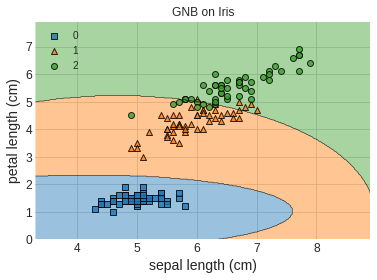

In [29]:
X = iris_dataset.data[:, [0,2]]
y = iris_dataset.target

# Training a classifier
gnb = GaussianNB()
gnb.fit(X, y)


# Plotting decision regions
plot_decision_regions(X, y, clf=gnb, legend=2)

# Adding axes annotations
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title('GNB on Iris')
plt.show()

In [30]:
!git status

fatal: not a git repository (or any of the parent directories): .git
